# 5 Support-Vector-Machines

Follow the notebook to understand the implementation of support vector machines using built-in libraries and functions followed by a visualization of their associated graphs and analysis of their accuracy.

First, we need to setup the dependencies and import the dataset.

In [1]:
!pip install -U scikit-learn --user

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#load in the data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme()
from sklearn import svm
from sklearn.inspection import DecisionBoundaryDisplay

#load and examine the raw contents of the dataset

from sklearn.datasets import load_wine

wine = load_wine(as_frame=True)
wines = wine.data
wines['target'] = wine.target


## Pre-Processing Data

Before implementing the SVM algorithm, we want to examine the dataframe input and whether any pre-processing needs to occur. Here we are using SkLearn's wine dataframe to see how it contrasts the external one used in past notebooks.

The dataset has dimensions of 178 rows x 14 columns. This is a highly condensed alternative to the external dataset previously used. We add the target (0s or 1s) from sklearn in the 14th column for readability and cohesion.

In [3]:
wines

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [4]:
wines.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

Since there is total data in this dataset, we want to graph specific features such as alcohol and flavanoids for the 3 types of wine: white, red, and blend.

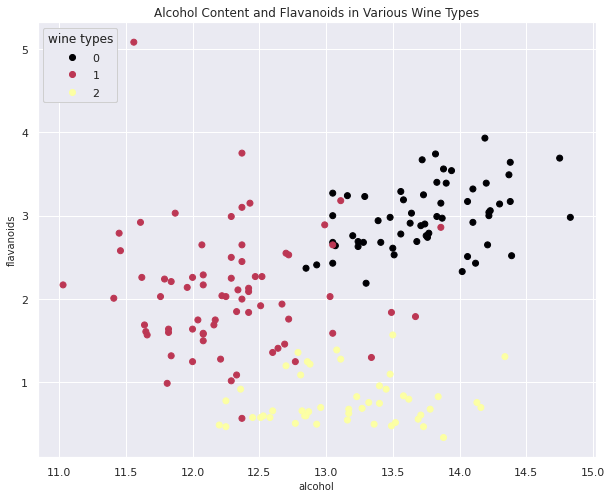

In [5]:
#for training and testing
X = wines[['alcohol', 'flavanoids']]
y = wines.target

#for graphing
a = wines.alcohol
b = wines.flavanoids

fig, ax = plt.subplots(figsize=(10, 8))
scatter = ax.scatter(a, b, c=y, cmap='inferno')

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="wine types")
ax.add_artist(legend1)
ax.set_xlabel(a.name, fontsize = 10)
ax.set_ylabel(b.name, fontsize = 10)
ax.set_title('Alcohol Content and Flavanoids in Various Wine Types')
ax.grid(True)

plt.show()

## Implementation

Here we use the skLearn SVC from the SVM library to model the algorithm. First we want to see the bounds of where information is sectioned and then run different kernels to see their accuracy.

In [6]:
C = 1.0  # SVM regularization parameter
models = svm.SVC(kernel="linear", C=C)
clf = models.fit(X, y)

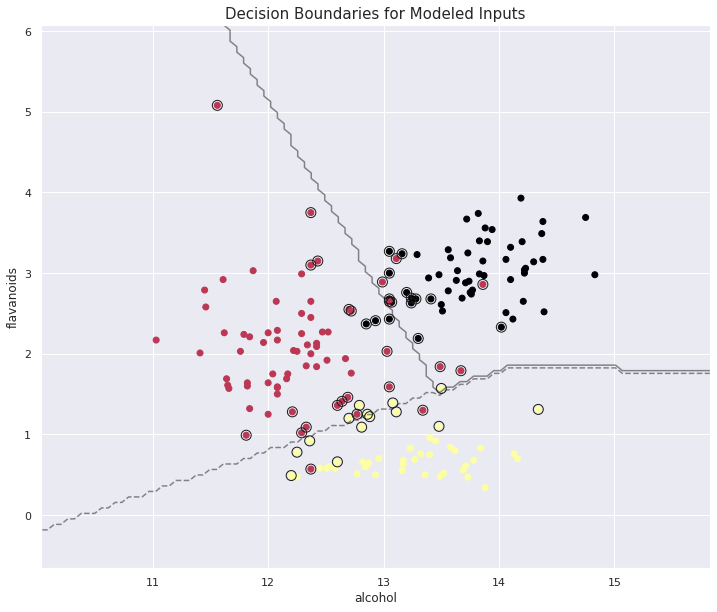

In [7]:
#plot the output of the linear SVM model
plt.figure(figsize = (12, 10))

X0, X1 = a,b
scatter = plt.scatter(a, b, c=y, cmap='inferno')
ax = plt.gca()

#generate the decision boundaries using the tentative lines
disp = DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
    )

ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.title('Decision Boundaries for Modeled Inputs', fontsize=15)
plt.show()

In the graph above, we can see the specific vector points that are instrumental to deciding the boundary split. In the next cell, let's see how the prediction will officially assign the boundary

<Figure size 864x720 with 0 Axes>

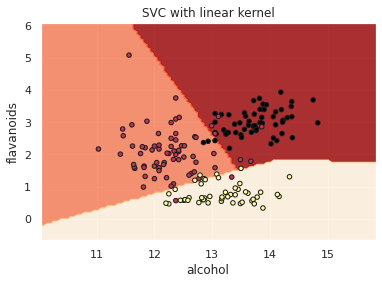

In [8]:
#plot the linear kernel decision boundary with the background prediction

plt.figure(figsize = (12, 10))

X0, X1 = a,b

#find the decision boundary using the prediction display
disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap='OrRd_r',
        alpha=0.8,
        xlabel= wines.alcohol.name,
        ylabel=wines.flavanoids.name,
    )

plt.scatter(X0, X1, c=y, cmap='inferno', s=20, edgecolors="k")

plt.title('SVC with linear kernel')
plt.show()

Let's test the two types of linear kernels: using SVC and LinearSVC with a trained model. 30% of the data is set as testing, with the remaining 70% as training data.

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=42)

In [10]:
C = 1.0  # SVM regularization parameter
#set the two model types
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000)
)
#fit both models
models = (clf.fit(X_train, y_train) for clf in models)

Accuracy for SVC with linear kernel SVM is 94.44444444444444
Accuracy for LinearSVC (linear kernel) SVM is 90.74074074074075


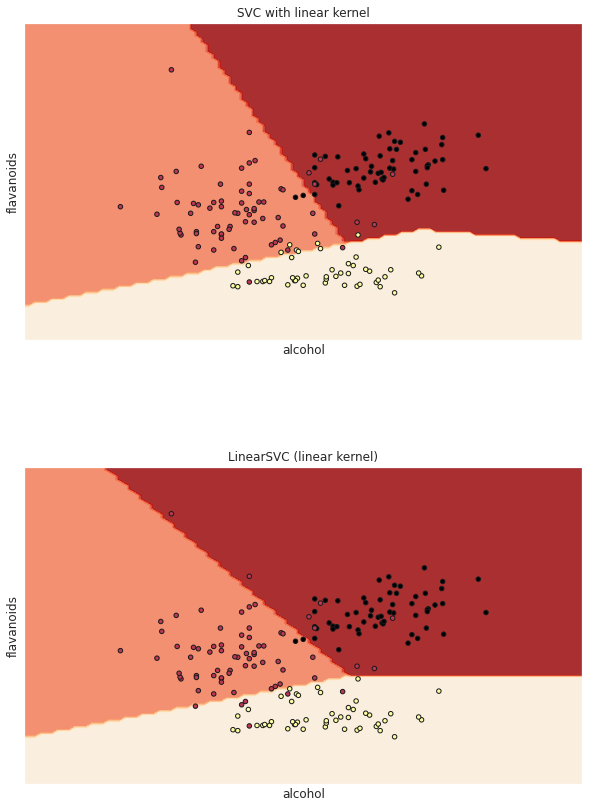

In [11]:
#print the outputs from the models, with their comparative accuracy
from sklearn.metrics import accuracy_score
# title for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)"
)

fig, sub = plt.subplots(2, 1, figsize=(10, 14))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = a,b

for clf, title, ax in zip(models, titles, sub):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap='OrRd_r',
        alpha=0.8,
        ax=ax,
        xlabel= wines.alcohol.name,
        ylabel=wines.flavanoids.name,
    )

    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)*100
    print(f"Accuracy for {title} SVM is {accuracy}")
    
    ax.scatter(X0, X1, c=y, cmap='inferno', s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
plt.show()

## Analysis

We can see from the two graphs above that the SVC model has a slightly improved accuracy over the LinearSVC model, even though both are pretty accurate.

Their respective graphs yield similar decison boundary outputs, but a few points are different along the boundary itself.